In [41]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import re
import wordcloud
from collections import Counter
from wordcloud import WordCloud
from wordcloud import  WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

# Libraries for data preparation and model building
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize 
nltk.download('punkt')
from string import punctuation

# Libraries from Sklearn
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report


from matplotlib.colors import ListedColormap

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier



import warnings
warnings.filterwarnings('ignore')

# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Precious\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Precious\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Loading the Data

In [2]:
train_data = pd.read_csv('train_set1.csv') #train data
test_data = pd.read_csv('test_set1.csv')  # test data

Percentage Distribution of Data

we have the percentage for categorical columns as: 
ssw    9.090909
nso    9.090909
afr    9.090909
xho    9.090909
eng    9.090909
ven    9.090909
sot    9.090909
tso    9.090909
nbl    9.090909
zul    9.090909
tsn    9.090909
Name: lang_id, dtype: float64


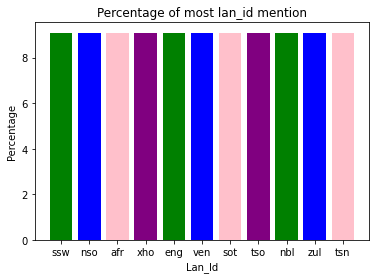

In [3]:
## Check the Percentage of the distribution in our data 
print("we have the percentage for categorical columns as: ")
d = train_data['lang_id'].value_counts(normalize = True) * 100 # series
print(d)

## plot for analysis
labels = train_data['lang_id'].unique()
plt.bar(x = d.index, height = d.values, label = d.index, color= ['green','blue','pink','purple'])
plt.xlabel("Lan_Id")

plt.ylabel("Percentage")
plt.title("Percentage of most lan_id mention")
plt.show()

They all show equal percentage Distribution

#### Usng a WordCloud to visulaize mentions/count of languages

In [4]:
def plot_wordcloud(message, mask=None, max_words=200, max_font_size=100, figure_size=(8,8), color = 'white',
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'u', "im"}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color=color,
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=400, 
                    height=200,
                    mask = mask)
    wordcloud.generate(str(message))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
d = '/kaggle/input/masks-for-wordclouds/'

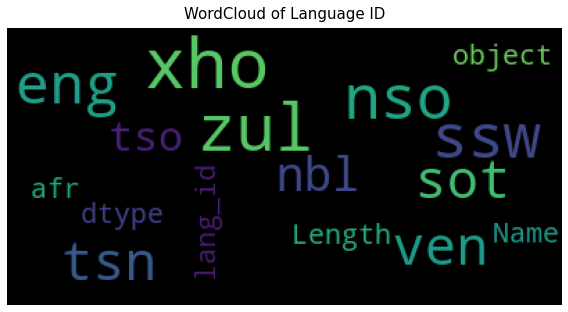

In [5]:
plot_wordcloud(train_data.lang_id,color='black',max_font_size=50,
               title_size=15,title="WordCloud of Language ID")

#### Data Preprocessing 

In [6]:
print("DATA CLEANING -- \n")
# emojis defined
emoji_pattern = re.compile("["
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         "]+", flags=re.UNICODE)

def replace_emojis(t):
  '''
  This function replaces happy unicode emojis with "happy" and sad unicode emojis with "sad.
  '''
  emoji_happy = ["\U0001F600", "\U0001F601", "\U0001F602","\U0001F603","\U0001F604","\U0001F605", "\U0001F606", "\U0001F607", "\U0001F609", 
                "\U0001F60A", "\U0001F642","\U0001F643","\U0001F923",r"\U0001F970","\U0001F60D", r"\U0001F929","\U0001F618","\U0001F617",
                r"\U000263A", "\U0001F61A", "\U0001F619", r"\U0001F972", "\U0001F60B", "\U0001F61B", "\U0001F61C", r"\U0001F92A",
                "\U0001F61D", "\U0001F911", "\U0001F917", r"\U0001F92D", r"\U0001F92B","\U0001F914","\U0001F910", r"\U0001F928", "\U0001F610", "\U0001F611",
                "\U0001F636", "\U0001F60F","\U0001F612", "\U0001F644","\U0001F62C","\U0001F925","\U0001F60C","\U0001F614","\U0001F62A",
                "\U0001F924","\U0001F634", "\U0001F920", r"\U0001F973", r"\U0001F978","\U0001F60E","\U0001F913", r"\U0001F9D0"]

  emoji_sad = ["\U0001F637","\U0001F912","\U0001F915","\U0001F922", r"\U0001F92E","\U0001F927", r"\U0001F975", r"\U0001F976", r"\U0001F974",
                       "\U0001F635", r"\U0001F92F", "\U0001F615","\U0001F61F","\U0001F641", r"\U0002639","\U0001F62E","\U0001F62F","\U0001F632",
                       "\U0001F633", r"\U0001F97A","\U0001F626","\U0001F627","\U0001F628","\U0001F630","\U0001F625","\U0001F622","\U0001F62D",
                       "\U0001F631","\U0001F616","\U0001F623"	,"\U0001F61E","\U0001F613","\U0001F629","\U0001F62B", r"\U0001F971",
                       "\U0001F624","\U0001F621","\U0001F620", r"\U0001F92C","\U0001F608","\U0001F47F","\U0001F480", r"\U0002620"]

  words = t.split()
  reformed = []
  for w in words:
    if w in emoji_happy:
      reformed.append("happy")
    elif w in emoji_sad:
      reformed.append("sad") 
    else:
      reformed.append(w)
  t = " ".join(reformed)
  return t


def replace_smileys(t):
  '''
  This function replaces happy smileys with "happy" and sad smileys with "sad.
  '''
  emoticons_happy = set([':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}', ':D',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)', '<3'])

  emoticons_sad = set([':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('])  

  words = t.split()
  reformed = []
  for w in words:
    if w in emoticons_happy:
      reformed.append("happy")
    elif w in emoticons_sad:
      reformed.append("sad") 
    else:
      reformed.append(w)
  t = " ".join(reformed)
  return t

def replace_contractions(t):
  '''
  This function replaces english lanuage contractions like "shouldn't" with "should not"
  '''
  cont = {"aren't" : 'are not', "can't" : 'cannot', "couln't": 'could not', "didn't": 'did not', "doesn't" : 'does not',
  "hadn't": 'had not', "haven't": 'have not', "he's" : 'he is', "she's" : 'she is', "he'll" : "he will", 
  "she'll" : 'she will',"he'd": "he would", "she'd":"she would", "here's" : "here is", 
   "i'm" : 'i am', "i've"	: "i have", "i'll" : "i will", "i'd" : "i would", "isn't": "is not", 
   "it's" : "it is", "it'll": "it will", "mustn't" : "must not", "shouldn't" : "should not", "that's" : "that is", 
   "there's" : "there is", "they're" : "they are", "they've" : "they have", "they'll" : "they will",
   "they'd" : "they would", "wasn't" : "was not", "we're": "we are", "we've":"we have", "we'll": "we will", 
   "we'd" : "we would", "weren't" : "were not", "what's" : "what is", "where's" : "where is", "who's": "who is",
   "who'll" :"who will", "won't":"will not", "wouldn't" : "would not", "you're": "you are", "you've":"you have",
   "you'll" : "you will", "you'd" : "you would", "mayn't" : "may not"}
  words = t.split()
  reformed = []
  for w in words:
    if w in cont:
      reformed.append(cont[w])
    else:
      reformed.append(w)
  t = " ".join(reformed)
  return t  

def remove_single_letter_words(t):
  '''
  This function removes words that are single characters
  '''
  words = t.split()
  reformed = []
  for w in words:
    if len(w) > 1:
      reformed.append(w)
  t = " ".join(reformed)
  return t  

print("Cleaning the tweets from the data.\n")
print("Replacing handwritten emojis with their feeling associated.")
print("Convert to lowercase.")
print("Replace contractions.")
print("Replace unicode emojis with their feeling associated.")
print("Remove all other unicoded emojis.")
print("Remove NON- ASCII characters.")
print("Remove numbers.")
print("Remove \"#\". ")
print("Remove \"@\". ")
print("Remove usernames.")
print("Remove \'RT\'. ")
print("Replace all URLs and Links with word \'URL\'.")
print("Remove all punctuations.")
print("Removes single letter words.\n")

def dataclean(t):
  '''
  This function cleans the tweets.
  '''
  t = replace_smileys(t) # replace handwritten emojis with their feeling associated
  t = t.lower() # convert to lowercase
  t = replace_contractions(t) # replace short forms used in english  with their actual words
  t = replace_emojis(t) # replace unicode emojis with their feeling associated
  t = emoji_pattern.sub(r'', t) # remove emojis other than smiley emojis
  t = re.sub('\\\\u[0-9A-Fa-f]{4}','', t) # remove NON- ASCII characters
  t = re.sub("[0-9]", "", t) # remove numbers # re.sub("\d+", "", t)
  t = re.sub('#', '', t) # remove '#'
  t = re.sub('@[A-Za-z0–9]+', '', t) # remove '@'
  t = re.sub('@[^\s]+', '', t) # remove usernames
  t = re.sub('rt[\s]+', '', t) # remove retweet 'RT'
  t = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', t) # remove links (URLs/ links)
  t = re.sub('[!"$%&\'()*+,-./:@;<=>?[\\]^_`{|}~]', '', t) # remove punctuations
  t = t.replace('\\\\', '')
  t = t.replace('\\', '')
  t = remove_single_letter_words(t) # removes single letter words
  return t

train_data['cleaned_texts'] = train_data['text'].apply(dataclean)
print("Texts have been cleaned.")

DATA CLEANING -- 

Cleaning the tweets from the data.

Replacing handwritten emojis with their feeling associated.
Convert to lowercase.
Replace contractions.
Replace unicode emojis with their feeling associated.
Remove all other unicoded emojis.
Remove NON- ASCII characters.
Remove numbers.
Remove "#". 
Remove "@". 
Remove usernames.
Remove 'RT'. 
Replace all URLs and Links with word 'URL'.
Remove all punctuations.
Removes single letter words.

Texts have been cleaned.


In [12]:
train_data.head()

,lang_id,text,cleaned_texts
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,idha iya kuba nobulumko bokubeka umsebenzi nap...
2,eng,the province of kwazulu-natal department of tr...,the province of kwazulunatal department of tra...
3,nso,o netefatša gore o ba file dilo ka moka tše le...,netefatša gore ba file dilo ka moka tše le dum...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...


Looking at our new dataframe, we now have a cleaned texts column.    
However, we still need to carry out further preprocessing like removing of stop words, lemmatization etc 

Pre - processing the texts.

"punkt" is downloaded.
"Stopwords" are downloaded.
Algorithm for lemmatization is downloaded.
--------------------------------------------------

Steps involved are : 

Step 1 - "Tokenization". 
Importing the necessary functions required for tokenization.
Necessary functions are downloaded.

Step 2 - "Removing the stopwprds". 
Importing the necessary functions required for removing stopwords.
Necessary functions are downloaded.
Stop words in ENGLISH language are : 

Step 3 - "Lemmatization". 
Importing the necessary functions required for lemmatization.
Necessary functions are downloaded.
Loading the algorithm for Lemmatization.
Algorithm for lemmatization is loaded.



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Precious\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Precious\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Precious\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


After preprocessing. ['umgaqo-siseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika', 'i-dha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekanga i-dha mayibize uncedo olufanelekileyo elungelweni layo', 'province kwazulu-natal department transport invite tender establish contractors experience bridge construction construction kwajolwayo tugela river pedestrian bridge near tugela ferry duration project months', 'netefatša gore ba file dilo ka moka tše le dumelelanego ka tšona mohlala maleri magolo šomišwago go fihlelela meagong e metelele scaffold bolokegilego lefelo la maleba la go šomela go phela gabotse bjbj', 'khomishini ya ndinganyiso ya mbeu yo ewa maana u ya nga mulayo wa khomishini ya 

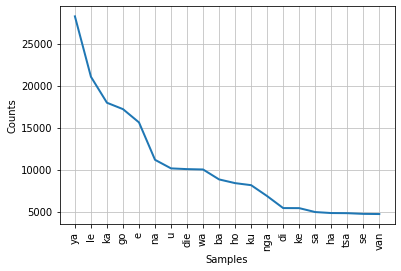


Word Cloud for the pre- processed data.


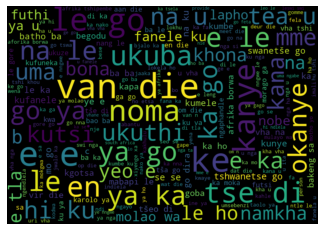

In [7]:
def freq_words(tokens):
  '''See frequency distribution of words'''
  from nltk.probability import FreqDist
  
  fdist = FreqDist(tokens)
  print(fdist) # total 508935 values and 56653 unique values
    
  # top 20 most common words
  print("Top 10 most common words in the data. \n")
  df = pd.DataFrame(fdist.most_common(20), columns=['Tokens', 'Frequency'])
  print(df)

  # plot of top 20 most common words
  fdist.plot(20, cumulative = False)
  plt.show()


def word_cloud(tokens):
  '''A word cloud (also known as text clouds or tag clouds) is a visualization, 
  the more a specific word appears in the text, the bigger and bolder it appears in the word cloud.
  '''
  from wordcloud import WordCloud
  w = ' '.join([i for i in tokens])
  wc = WordCloud(width = 1000, height = 700, random_state=21, max_font_size=110).generate(w)
  plt.imshow(wc, interpolation = "bilinear")
  plt.axis('off')
  plt.show()


def preprocess(t):
  # downloading necessary packages
  from nltk.tokenize import word_tokenize
  from nltk.corpus import stopwords
  stop_words = set(stopwords.words('english'))
   
  from nltk.stem.wordnet import WordNetLemmatizer
  lem = WordNetLemmatizer()
  
  # tokenization
  tw = []  
  tw = word_tokenize(t)  
  
  # remove the stopwords
  fs = [] # filtered list after removing stop words
  fs = ([i for i in tw if i not in stop_words])
  
  # lemmatization  
  ns = []
  for i in fs:
    ns.append(lem.lemmatize(i, 'v'))
  ns = ' '.join(ns)
  return ns  


print("Pre - processing the texts.\n")
print("Downloading necessary packages for preprocessing.")
## for tokenization
if (nltk.download("punkt")):
  print("\"punkt\" is downloaded.")
## for stopwords
if (nltk.download('stopwords')):
  print("\"Stopwords\" are downloaded.")
## for lemmatization
if (nltk.download('wordnet')):
  print("Algorithm for lemmatization is downloaded.")  
print("-" * 50)
print("\nSteps involved are : ")
print("\nStep 1 - \"Tokenization\". ")
print("Importing the necessary functions required for tokenization.")

print("Necessary functions are downloaded.")
print("\nStep 2 - \"Removing the stopwprds\". ")
print("Importing the necessary functions required for removing stopwords.")
print("Necessary functions are downloaded.")
print("Stop words in ENGLISH language are : ")

print("\nStep 3 - \"Lemmatization\". ")
print("Importing the necessary functions required for lemmatization.")
print("Necessary functions are downloaded.")
print("Loading the algorithm for Lemmatization.")
print("Algorithm for lemmatization is loaded.\n")
  
pp_list = []
for text in train_data['text']:
  pp_list.append(preprocess(text))
print("After preprocessing.", pp_list[:5])

# for graphical display of preprocessed data

tokens = []
for i in pp_list:
  tokens.extend(word_tokenize(i))
print("Top 20 words used in the texts are : \n", tokens[:20])
print("\nFrequency distribution of top 20 words in the texts.\n")
freq_words(tokens)
print("\nWord Cloud for the pre- processed data.")
word_cloud(tokens)

After Carrying out preprocessing, we can see the most occuring words and their size based on how many times they occur

### Model Training 

In [26]:
# Dividing Data to Training and Validation Sets
from sklearn.model_selection import train_test_split  
x = pp_list
y = train_data['lang_id'].values
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state = 20) #using a 30% test size
print("Number of data points in training data :\n")
print("X = ", len(x_train))
print("Y = ", len(y_train))

print("\nNumber of data points in validation data :\n")
print("X = ", len(x_val))
print("Y = ", len(y_val))

Number of data points in training data :

X =  23100
Y =  23100

Number of data points in validation data :

X =  9900
Y =  9900


Now we will use a Vectorizer to transform our texts into vetcors(numbers) that our machine can understand and work with

###  TFidVectorizer

In [27]:
print("Now convert these pre processed text to numeric format to send it to the model.")
print("Using TF-IDF approach to covert text to numbers.\n")

vectorizer = TfidfVectorizer() #instantiating the vectorizer
train_vectors = vectorizer.fit_transform(x_train)

val_vectors = vectorizer.transform(x_val)
print("Shape of training data : ",train_vectors.shape, "\nShape of validation data : ",val_vectors.shape)


Now convert these pre processed text to numeric format to send it to the model.
Using TF-IDF approach to covert text to numbers.

Shape of training data :  (23100, 114524) 
Shape of validation data :  (9900, 114524)


### Let us carry out a test of multiple Models 

In [14]:
names = ['Logistic Regression', 'Nearest Neighbors',
         'Linear SVM', 'RBF SVM',
         'Decision Tree', 'Random Forest',  'AdaBoost', "Naive Bayes"]

In [15]:
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    MultinomialNB(0.05)
]


# Dividing Data to Training and Validation Sets
from sklearn.model_selection import train_test_split  
x = pp_list
y = train_data['lang_id'].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 1)
print("Number of data points in training data :\n")
print("X = ", len(X_train))
print("Y = ", len(y_train))

print("\nNumber of data points in test data :\n")
print("X = ", len(X_test))
print("Y = ", len(y_test))

In [17]:
vect = CountVectorizer(stop_words='english', min_df= .01)
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)


results = []

models = {}
confusion = {}
class_report = {}


for name, clf in zip(names, classifiers):
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(X_train, y_train)

    print ('... predicting')
    y_pred = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    print ('... scoring')
    accuracy  = metrics.accuracy_score(y_train, y_pred)
    precision = metrics.precision_score(y_train, y_pred, average= None)
    recall    = metrics.recall_score(y_train, y_pred, average=None)

    f1        = metrics.f1_score(y_train, y_pred, average=None)
    f1_test   = metrics.f1_score(y_test, y_pred_test, average=None)

    # Save the results to dictionaries
    models[name] = clf
    confusion[name] = metrics.confusion_matrix(y_train, y_pred)
    class_report[name] = metrics.classification_report(y_train, y_pred)

    results.append([name, accuracy, precision, recall, f1, f1_test, run_time.best])


results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test', 'Train Time'])
results.set_index('Classifier', inplace= True)

print ('... All done!')

Fitting Logistic Regression model...
... predicting
... scoring
Fitting Nearest Neighbors model...
... predicting
... scoring
Fitting Linear SVM model...
... predicting
... scoring
Fitting RBF SVM model...
... predicting
... scoring
Fitting Decision Tree model...
... predicting
... scoring
Fitting Random Forest model...
... predicting
... scoring
Fitting AdaBoost model...
... predicting
... scoring
Fitting Naive Bayes model...
... predicting
... scoring
... All done!


In [18]:
results

,Accuracy,Precision,Recall,F1 Train,F1 Test,Train Time
Classifier,,,,,,
Logistic Regression,0.920114,"[0.9995803608896349, 0.7727994915792818, 0.814...","[0.9966527196652719, 0.9975389663658737, 0.746...","[0.9981143934632306, 0.8709042076991943, 0.779...","[0.9950657894736842, 0.8491281273692192, 0.768...",2.260915
Nearest Neighbors,0.907955,"[0.9966555183946488, 0.775647171620326, 0.7489...","[0.9974895397489539, 0.9954881050041017, 0.810...","[0.9970723546633208, 0.8719238368959943, 0.778...","[0.9967159277504104, 0.8488990129081245, 0.707...",0.027330
Linear SVM,0.900076,"[0.9987410826689047, 0.645186953062848, 0.7686...","[0.99581589958159, 0.9979491386382281, 0.72918...","[0.9972763461135554, 0.7837010790787565, 0.748...","[0.9958847736625513, 0.7646258503401361, 0.742...",4.194254
RBF SVM,0.945038,"[1.0, 0.7790585975024016, 0.8927444794952681, ...","[0.997907949790795, 0.9979491386382281, 0.8330...","[0.9989528795811519, 0.8750224779715879, 0.861...","[0.3472409152086137, 0.8488104374520338, 0.669...",123.200698
Decision Tree,0.532424,"[0.9973368841544608, 0.19117993868406571, 0.0,...","[0.9401673640167364, 0.9975389663658737, 0.0, ...","[0.9679086797329314, 0.3208654924467313, 0.0, ...","[0.9644670050761421, 0.2980079681274901, 0.0, ...",0.059564
Random Forest,0.594848,"[0.9548419468138485, 0.2520990312163617, 0.660...","[0.796234309623431, 0.9606234618539786, 0.2401...","[0.8683550079853982, 0.39938608458390173, 0.35...","[0.8886925795053003, 0.36893862326212273, 0.36...",0.071122
AdaBoost,0.456136,"[0.996031746031746, 0.21836808051761322, 0.318...","[0.9451882845188284, 0.9967186218211649, 0.067...","[0.9699441820523831, 0.3582485625829279, 0.111...","[0.9629005059021921, 0.3294951284322409, 0.088...",2.905114
Naive Bayes,0.909508,"[0.9908675799086758, 0.7782467532467533, 0.767...","[0.998744769874477, 0.98318293683347, 0.737594...","[0.994790581371119, 0.8687930409568684, 0.7524...","[0.9959116925592805, 0.84656900539707, 0.75450...",0.084162


### Points to note from the above models

 * The RBF SVM model performed best in the training set when compared to other models, but it didn't perform as much in the Kaggle Competition.
 * Other models such as Logistic Regression, Nearest Neighbors also performed well but had low Accuracy/F1 Score when tested in the Kaggle Evaluator 
 * Of all perfoming models, the Naive Bayes (MultinomialNB) had the highest score on Kaggle.
 
Thus, we will be using the Naive Bayes model for this competition


### NOTE
Another point to note is that, for a better performing model that does well on both training data and unseen data, we will be using the **TfidVectorizer** as opposed to the **Countvectorizer**.. 

The explanation below will address our choice of vectorizer:



### Sklearn  >>>>
provides facilities to extract numerical features from a text document by tokenizing, counting and normalizing.
***CountVectorizer*** performs tha  task of tokenizing and counnting, while ***TfidTransformer*** normalizes the data.

***TfidVectorizer***, on the other hand, performs all three operations, thereby streamlining the process of natural languaage processing.

#### Using the Naive Bayes Model -- Multinomial (multilabel classification)

In [28]:
naive_bayes = MultinomialNB(0.05) #setting our alpha parameter as 0.05
# Fit the model 
naive_bayes.fit(train_vectors, y_train)

MultinomialNB(alpha=0.05)

#### Carrying out Classification report and other metrics to test the model performance on the Validations set

Let us test the performance of our model on the validation set to predict the language labels using the different ML models trained.
PERFORMANCE OF Naive Bayes MODEL : 

Predicting the Language...

Analysis after prediction : 

nso    9.545455
nbl    9.383838
xho    9.353535
tsn    9.151515
ven    9.151515
afr    9.040404
zul    9.010101
ssw    8.969697
tso    8.949495
sot    8.797980
eng    8.646465
Name: predicted, dtype: float64


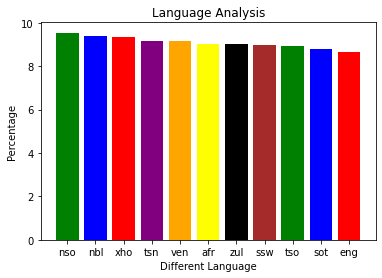

Confusion Matrix :
 [[895   0   0   0   0   0   0   0   0   0   0]
 [  0 856   0   0   0   0   0   0   0   0   0]
 [  0   0 929   0   0   0   0   0   0   0   1]
 [  0   0   0 945   1   0   0   0   0   0   0]
 [  0   0   0   0 870   0   0   0   0   0   0]
 [  0   0   0   0   0 888   0   0   0   0   0]
 [  0   0   0   0   0   0 906   0   0   0   0]
 [  0   0   0   0   0   0   0 886   0   0   0]
 [  0   0   0   0   0   0   0   0 906   0   0]
 [  0   0   0   0   0   0   0   0   0 926   0]
 [  0   0   0   0   0   0   0   0   0   0 891]]
classification report: 
               precision    recall  f1-score   support

         afr       1.00      1.00      1.00       895
         eng       1.00      1.00      1.00       856
         nbl       1.00      1.00      1.00       930
         nso       1.00      1.00      1.00       946
         sot       1.00      1.00      1.00       870
         ssw       1.00      1.00      1.00       888
         tsn       1.00      1.00      1.00       906
    

In [42]:
def performance(model, y_true, vectors):

    
  print("Predicting the Language...")
  y_pred = naive_bayes.predict(vectors)  #getting the predicted results of our model
  df = pd.DataFrame({'actual' : y_true, 'predicted' : y_pred}) #turning it into a data frame
  print("\nAnalysis after prediction : \n")
  d = df['predicted'].value_counts(normalize = True) * 100 # getting the total counts of our predicted result
  print(d)
    
    
  ## plot for analysis
  plt.bar(x = d.index, height = d.values, label = d.index, color= ['green','blue','red', 'purple','orange','yellow','black','brown'])
  plt.xlabel("Different Language") 
  plt.ylabel("Percentage")
  plt.title('Language Analysis')
  plt.show()
  
  cm = confusion_matrix(y_true,y_pred) #carrying out a confusion matrix
  crp = classification_report(y_true,y_pred) # carrying out a classificationo report
  acc = accuracy_score(y_true,y_pred) # Carrying out accuracy Score
  return (cm, crp, acc)

print("Let us test the performance of our model on the validation set to predict the language labels using the different ML models trained.")
print("PERFORMANCE OF Naive Bayes MODEL : \n")
perform = performance(naive_bayes, y_val, val_vectors)
print("Confusion Matrix :\n", perform[0])  
print("classification report: \n", perform[1])  
print("Accuracy score  = ", perform[2] *100)
print("-" * 100)

Our model performs well on the validation set..    
This would be a similar result on the kaggle Challenge, except of course for a few points below the above score

#### Loading the Test Data

In [43]:
test_data.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


Our task is to provide the possible Language ID as a column that matches every word or mention in the text column.  
This would be our Response Variable (Y)

#### Carrying out similar preprocessing/cleaning of text and Vertorizing we did when training our model

In [44]:
print("-" *20, "Testing the model of Test dataset", "-" * 20)
test_data.head()
print("\nShape of test data = ", test_data.shape)
test_data['cleaned_texts'] = test_data['text'].apply(dataclean) #applyinng the "dataclean" function used in the training data during celaning

print("-" * 50)
print("\nBuilding Features for the test data set.")
test_list = []
for text in test_data['cleaned_texts']:
  test_list.append(preprocess(text))
print("After preprocessing test texts looks like : \n", test_list[:5], "\n")
print("-" * 50)

test_vectors = vectorizer.transform(test_list)
print("Shape of testing features : ",test_vectors.shape)
print("-" * 50)

print("\nLet us test the performance of our model on the testing set to predict the language labels.")
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
predicted = naive_bayes.predict(test_vectors)

print("Results : \n")
results = pd.DataFrame({'index' : test_data['index'].astype(str), 'lang_id' : predicted}, 
                       columns = ['index', 'lang_id'])
print(results)
results.to_csv("Precious_model.csv", sep= ",", index = False)
print("-" * 50)

print("Analysis on the test dataset.. \n")
d = results['lang_id'].value_counts(normalize = True) * 100

-------------------- Testing the model of Test dataset --------------------

Shape of test data =  (5682, 2)
--------------------------------------------------

Building Features for the test data set.
After preprocessing test texts looks like : 
 ['mmasepala fa maemo kgethegileng letlelela kgato eo', 'uzakwaziswa ngokufaneleko nakungafuneka eminye imitlolo engezelelako ukuqedelela ukutloliswa kwesibawo sakho', 'tshivhumbeo tshi fana na ngano dza vhathu', 'kube inja nelikati betingevakala kutsi titsini naticocisana', 'winste op buitelandse valuta'] 

--------------------------------------------------
Shape of testing features :  (5682, 114524)
--------------------------------------------------

Let us test the performance of our model on the testing set to predict the language labels.
Results : 

     index lang_id
0        1     tsn
1        2     nbl
2        3     ven
3        4     ssw
4        5     afr
5        6     nso
6        7     eng
7        8     sot
8        9     zul
9 

### Save Model as Pickle File

In [49]:
import pickle

model_save_path = 'naive_bayes.pkl'

with open(model_save_path, 'wb') as file:
    pickle.dump(naive_bayes,file)

In [50]:
model_load_path = 'naive_bayes.pkl'

with open(model_load_path, 'rb') as file:
    unpickled_model = pickle.load(file)

In [51]:
y_pred = unpickled_model.predict(test_vectors)
y_pred

array(['tsn', 'nbl', 'ven', ..., 'sot', 'sot', 'nbl'], dtype='<U3')

### Extract from Kaggle Submission

>>> Submitted Kaggle Mean F1-Score :  **0.96673**

# THank YOu!!